In [1]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.viewer.mpl      import createColorBarOnly
from    JointEntropyClass_with_sensitivity_weighting        import JointEntropyInversion as JEI

# Importing auxiliary libraries
import  numpy                   as     np
import  matplotlib.pyplot       as     plt
import  sys

# Setting options
seed_val = 420
np.random.seed(seed_val)

# Filenames
fn_ert_dd  = 'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Data/Synthetic/Synth_ert_dd.dat'
fn_tt      = 'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Data/Synthetic/Synth_tt.dat'

# Plotting
c_ert = 'gnuplot'
c_srt = 'viridis'
lim_ert = [5e1, 1e4]
[r_left, r_right, r_back] = [7e1, 7e3, 7e2]
ert_label = ['Square', 'Circle', 'Half-space']

lim_srt = [300, 4200]
[v_left, v_right, v_layer1, v_layer2] = [3e3, 2e3, 5e2, 4e3]
srt_label = ['Square', 'Circle', 'Layer 1', 'Layer 2']

## Data and Inversion Mesh

In [2]:
# Loading ERT
ert_data = ert.load(fn_ert_dd)
ERT = ert.ERTManager(ert_data)

# Loading SRT
tt_data = pg.physics.traveltime.load(fn_tt)
SRT = TravelTimeManager(tt_data)

# inversion mesh
w = mt.createWorld([-65,-20], [65, 0])
for x in np.arange(-64,65,1):
    w.createNode([x,0])
invmesh = mt.createMesh(w,area=1.5)
extmesh = mt.appendTriangleBoundary(invmesh,xbound=100,ybound=100,marker=0)

# fig, ax = plt.subplots(1,3)
# ERT.showData(ert_data, ax=ax[0], cMap=c_ert)
# SRT.showData(tt_data, ax=ax[1], cMap=c_srt)
# pg.show(invmesh, ax=ax[2])

## Get sensitivities

In [5]:
r_est_con = ERT.invert(ert_data, mesh = extmesh, lam=2, verbose=False)
v_est_con = SRT.invert(tt_data, mesh=invmesh, vTop=500, vBottom=4500, lam=6, secNodes=1, verbose=False, maxIter=30)

J_e = np.array(ERT.inv.fop.jacobian())
sens_ert = (np.dot(J_e.transpose(),J_e)).diagonal()**0.25

J_s = pg.utils.sparseMatrix2Dense(SRT.inv.fop.jacobian())
sens_srt = (np.dot(J_s.transpose(),J_s)).diagonal()**0.25
        
sens_srt_norm = sens_srt.copy()
sens_ert_norm = sens_ert.copy()
sens_srt_norm = sens_srt_norm/max(sens_srt)+1
sens_ert_norm = (sens_ert_norm-min(sens_ert_norm))/(max(sens_ert_norm)-min(sens_ert_norm))+1

13/06/23 - 09:05:00 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:05:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:05:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:05:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/06/23 - 09:05:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:05:01 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:05:01 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:06:18 - pyGIMLi - INFO - Found 1 regions.


13/06/23 - 09:06:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:06:18 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
13/06/23 - 09:06:18 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 09:06:18 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


## Set order $q$ for following calculations

In [6]:
q = 2

## ME ERT lambda and smoothing tests

13/06/23 - 09:09:31 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:09:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:09:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:09:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 09:09:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:09:31 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:09:31 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:09:31 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 5.92
#####     stabilizing functional    S = 5.25
#####     joint weighted misfit chi^2 = 5.92
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.51
#####     stabilizing functional    S = 6.13
#####     joint weighted misfit chi^2 = 1.51
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.10
#####     stabilizing functional    S = 5.48
#####     joint weighted misfit chi^2 = 1.10
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.00
#####     stabilizing functional    S = 5.68
##

13/06/23 - 09:12:11 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:12:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:12:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:12:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/06/23 - 09:12:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368


Starting Iteration 0...
... ERT


13/06/23 - 09:12:11 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:12:11 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:12:11 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 5.93
#####     stabilizing functional    S = 5.24
#####     joint weighted misfit chi^2 = 5.93
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.50
#####     stabilizing functional    S = 6.11
#####     joint weighted misfit chi^2 = 1.50
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.09
#####     stabilizing functional    S = 5.48
#####     joint weighted misfit chi^2 = 1.09
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 0.99
#####     stabilizing functional    S = 5.67
##

13/06/23 - 09:15:00 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:15:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:15:00 - pyGIMLi - INFO - Creating forward mesh from region infos.


Starting Iteration 0...
... ERT


13/06/23 - 09:15:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/06/23 - 09:15:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:15:00 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:15:00 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:15:00 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 6.95
#####     stabilizing functional    S = 5.04
#####     joint weighted misfit chi^2 = 6.95
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 2.68
#####     stabilizing functional    S = 6.02
#####     joint weighted misfit chi^2 = 2.68
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 2.15
#####     stabilizing functional    S = 6.58
#####     joint weighted misfit chi^2 = 2.15
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 2.10
#####     stabilizing functional    S = 6.97
##

13/06/23 - 09:23:52 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:23:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:23:52 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:23:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 09:23:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:23:53 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:23:53 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:23:53 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 5.89
#####     stabilizing functional    S = 5.26
#####     joint weighted misfit chi^2 = 5.89
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.50
#####     stabilizing functional    S = 6.13
#####     joint weighted misfit chi^2 = 1.50
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.09
#####     stabilizing functional    S = 5.48
#####     joint weighted misfit chi^2 = 1.09
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.00
#####     stabilizing functional    S = 5.7

13/06/23 - 09:27:44 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:27:44 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:27:44 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:27:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 09:27:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:27:45 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:27:45 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:27:45 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 5.05
#####     stabilizing functional    S = 6.38
#####     joint weighted misfit chi^2 = 5.05
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.14
#####     stabilizing functional    S = 5.58
#####     joint weighted misfit chi^2 = 1.14
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 0.92
#####     stabilizing functional    S = 5.29
#####     joint weighted misfit chi^2 = 0.92
############################################################
       
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          joint chi^2 < 1.00         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
All

13/06/23 - 09:30:57 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:30:57 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:30:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:30:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 09:30:57 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:30:58 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:30:58 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:30:58 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 4.01
#####     stabilizing functional    S = 10.88
#####     joint weighted misfit chi^2 = 4.01
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.59
#####     stabilizing functional    S = 9.45
#####     joint weighted misfit chi^2 = 1.59
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.37
#####     stabilizing functional    S = 8.50
#####     joint weighted misfit chi^2 = 1.37
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.36
#####     stabilizing functional    S = 8.

13/06/23 - 09:40:22 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:40:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:40:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:40:22 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/06/23 - 09:40:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368


Starting Iteration 0...
... ERT


13/06/23 - 09:40:22 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:40:22 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:40:22 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 5.40
#####     stabilizing functional    S = 5.41
#####     joint weighted misfit chi^2 = 5.40
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.33
#####     stabilizing functional    S = 6.02
#####     joint weighted misfit chi^2 = 1.33
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.00
#####     stabilizing functional    S = 5.51
#####     joint weighted misfit chi^2 = 1.00
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 0.91
#####     stabilizing functional    S =

13/06/23 - 09:44:28 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:44:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:44:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:44:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 09:44:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:44:28 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:44:28 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:44:28 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 4.67
#####     stabilizing functional    S = 8.94
#####     joint weighted misfit chi^2 = 4.67
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 0.96
#####     stabilizing functional    S = 4.91
#####     joint weighted misfit chi^2 = 0.96
############################################################
       
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          joint chi^2 < 1.00         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
All weights saved under self.weights


13/06/23 - 09:46:48 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:46:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:46:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:46:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 09:46:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:46:48 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:46:48 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:46:48 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 7.83
#####     stabilizing functional    S = 18.74
#####     joint weighted misfit chi^2 = 7.83
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.83
#####     stabilizing functional    S = 4.97
#####     joint weighted misfit chi^2 = 1.83
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.53
#####     stabilizing functional    S = 9.56
#####     joint weighted misfit chi^2 = 1.53
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.50
#####     stabilizing functional    S 

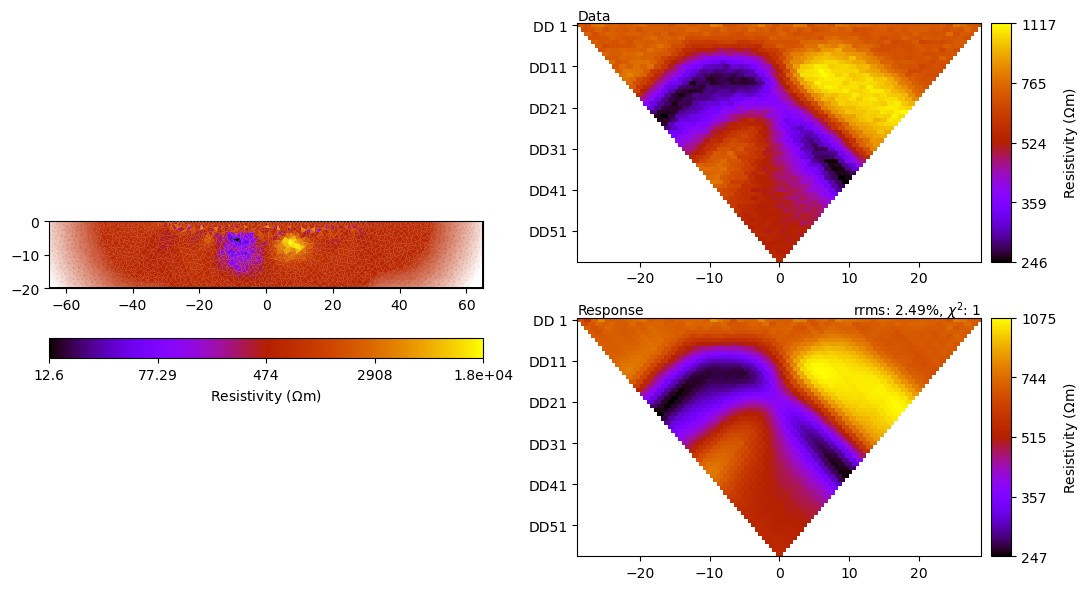

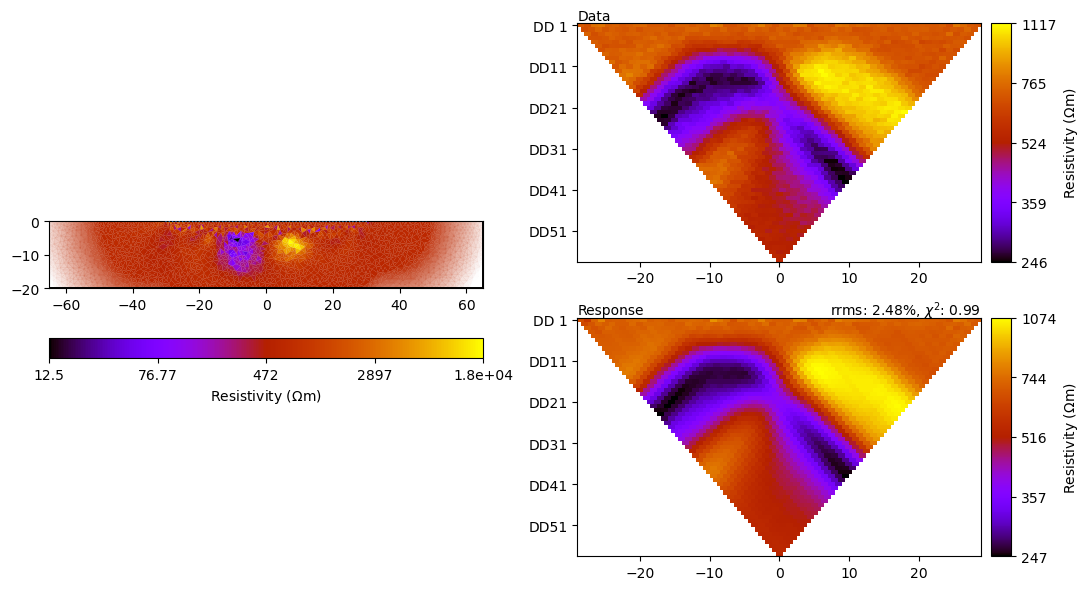

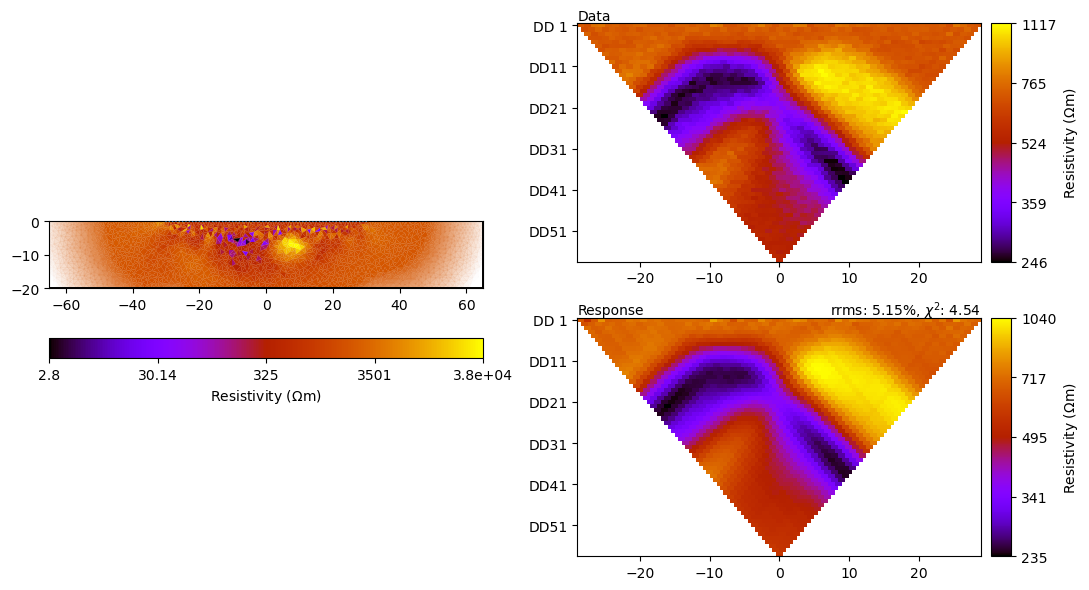

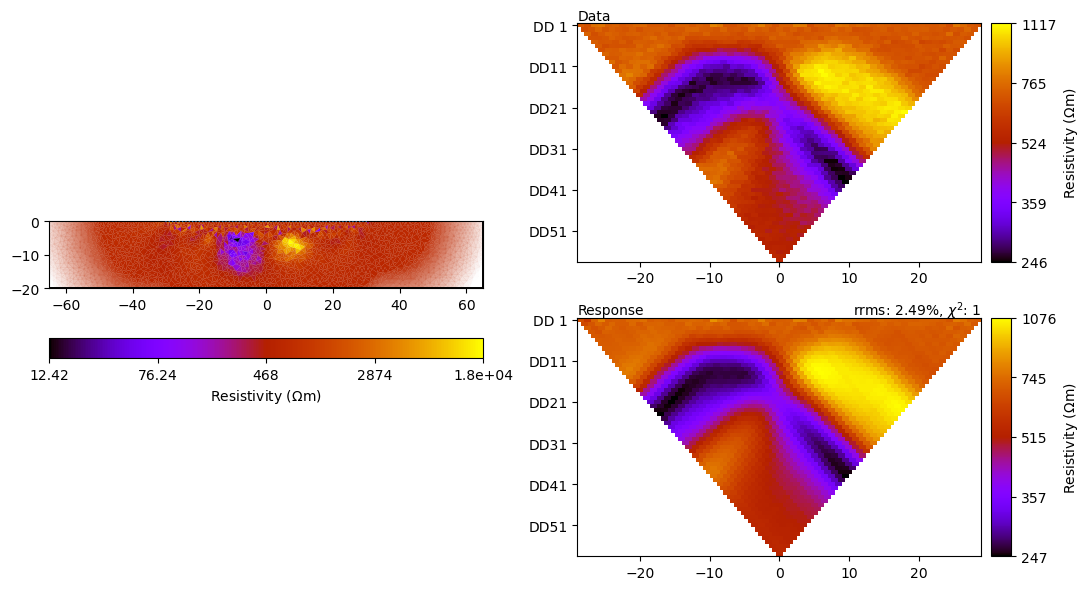

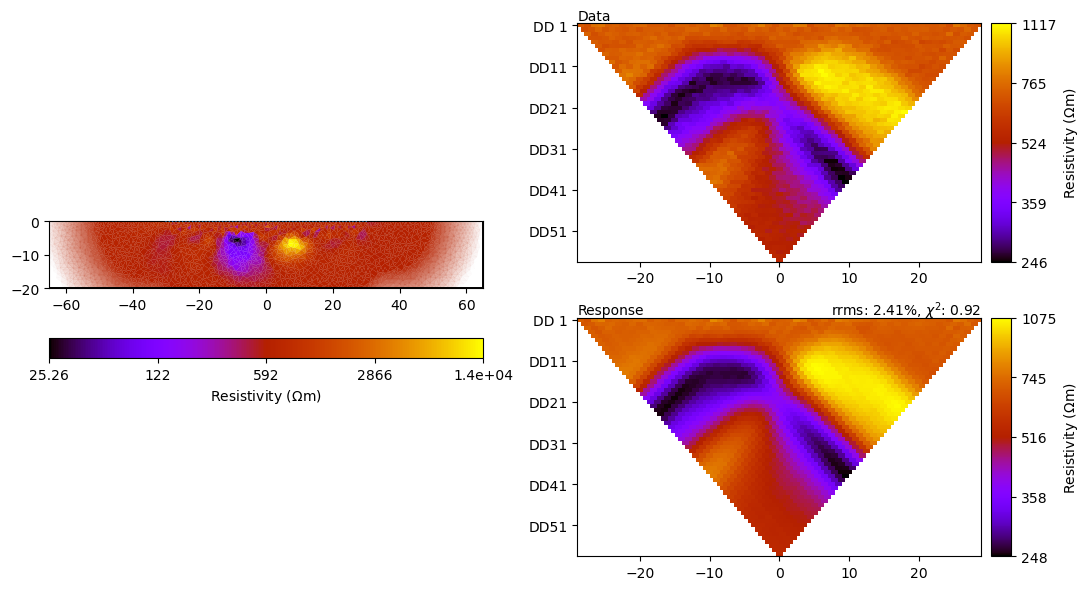

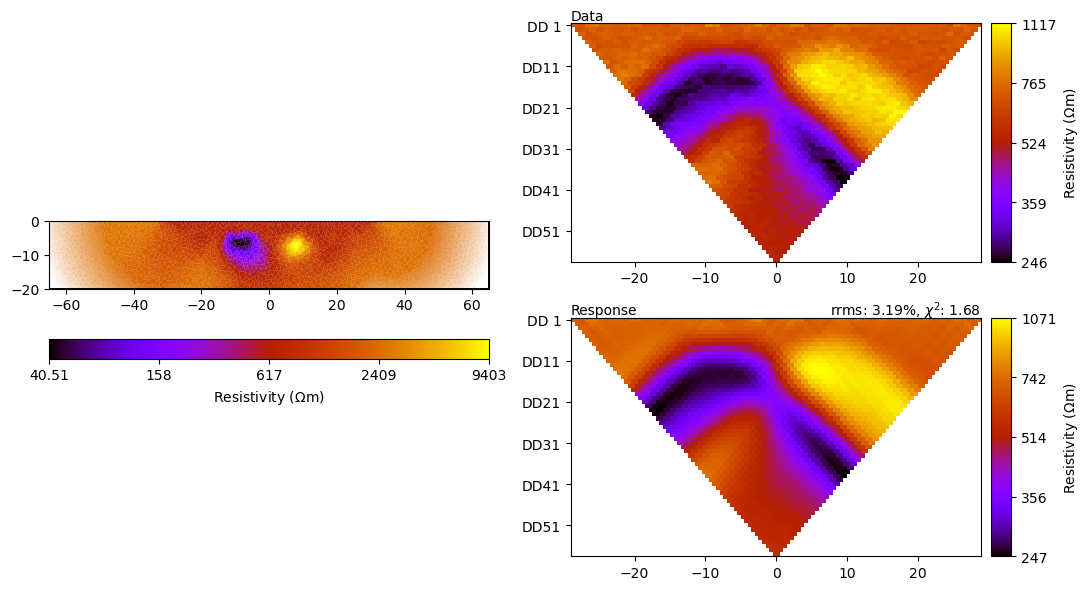

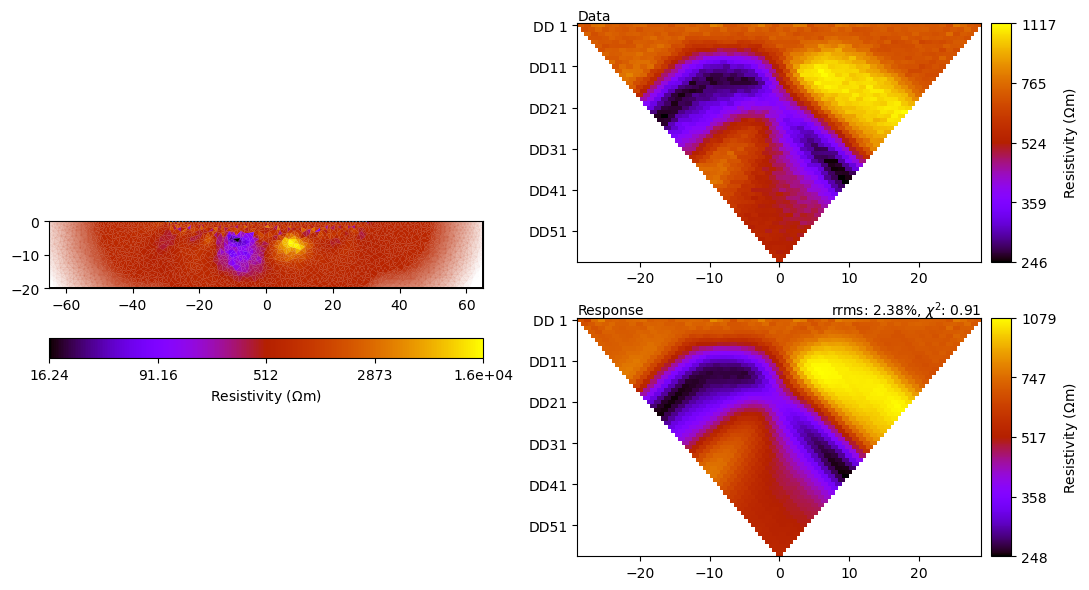

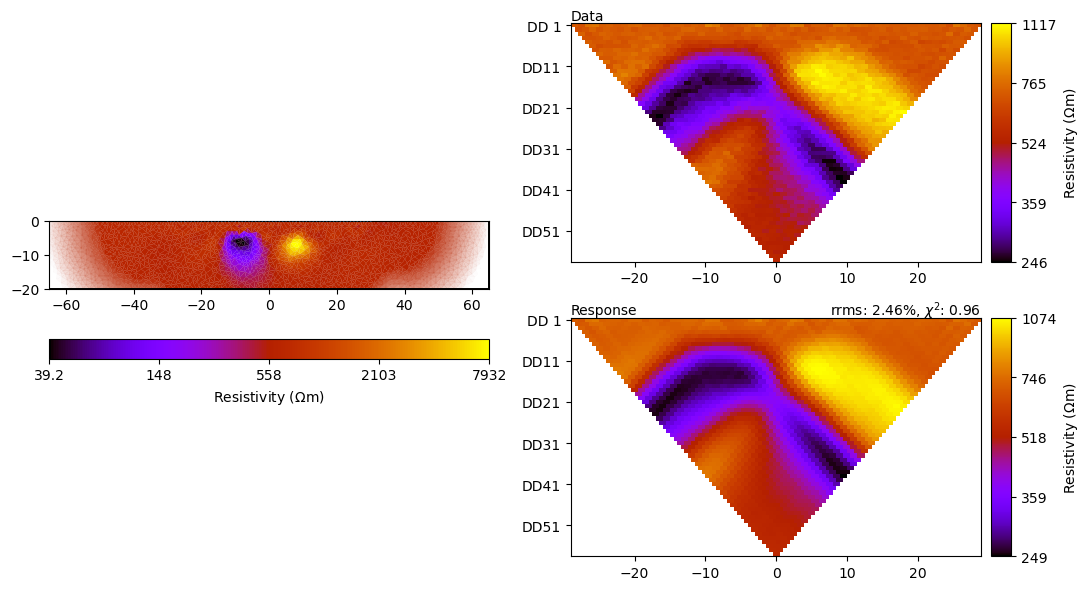

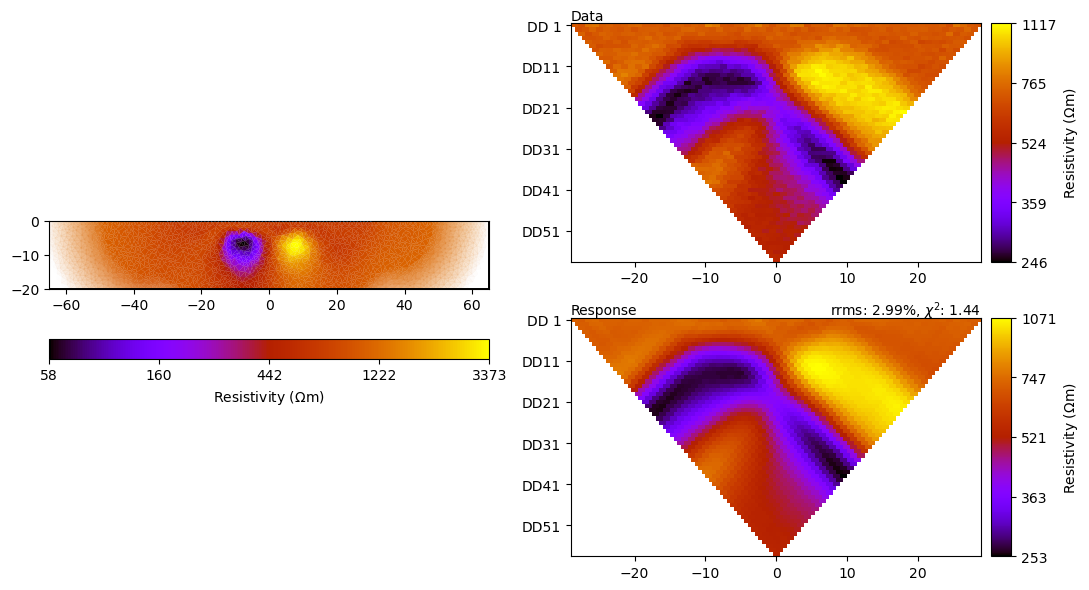

In [7]:
a_list = [0, 25, 100]
lam_list = [1e-5, 1e-3, 1e-1] 
beta = 1e-10

r_me = []
tit  = []

for a in a_list:
    for lam in lam_list:
        ERT2 = ert.ERTManager(ert_data)
        Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a, sensitivity_list=[sens_ert_norm])

        KWe = dict(lam=lam, verbose=False)
        Je.setKWInv([KWe])
        Je.setNames(['ERT'])
        Je.setMethodMesh(extmesh, 0)

        Je.runInversion('ME', maxIter=10, chi_limit=1)
        ERT2.showResultAndFit(cMap=c_ert)

        [r_est] = Je.getModels()
        
        r_me.append(r_est)
        tit.append(f'lam={lam}, a={a}')

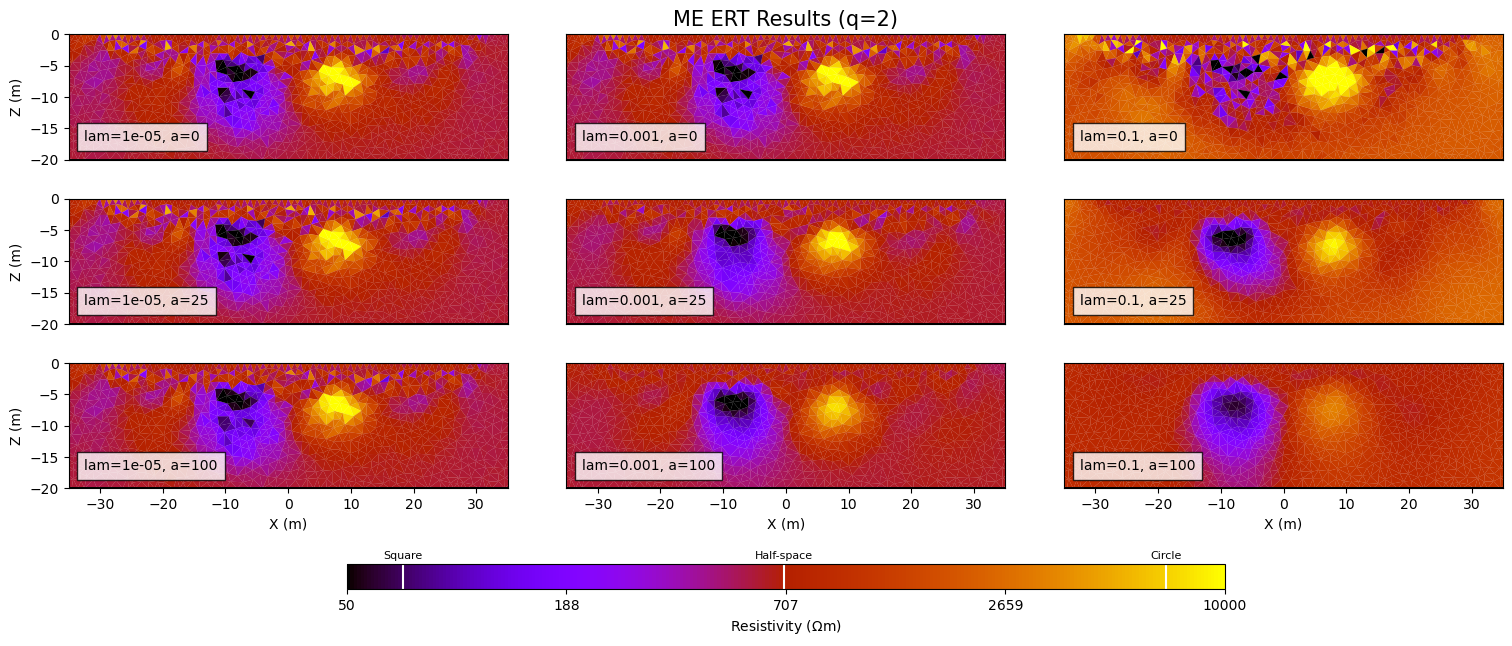

In [8]:
fig, ax = plt.subplots(3,3, figsize=(15,5))
fig.tight_layout(pad=0.5)
ax[0,1].set_title(f'ME ERT Results (q={q})', fontsize = 15)
for i in np.arange(3):
    for j in np.arange(3):
        pg.show(invmesh, r_me[i*3+j], ax=ax[i,j], 
                cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], 
                colorBar=False, logScale=True)
        
        ax[i,j].text(-32.5, -17, tit[i*3+j], fontsize=10,
                     bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        ax[i,j].set_xlim(-35,35)
        ax[i,j].set_ylim(-20,0)

# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Z (m)')
for axis in ax[-1,:]:
    axis.set_xlabel('X (m)')
for axis_ar in ax[:2,:]:
    for axis in axis_ar:
        axis.set_xticks([])
for axis_ar in ax[:,1:]:
    for axis in axis_ar:
        axis.set_yticks([])

# Add colorbar
cax = ax[2,1].inset_axes([-0.5, -0.8, 2, 0.2])
createColorBarOnly(ax=cax, cMin=lim_ert[0], cMax=lim_ert[1], logScale=True,cMap=c_ert,
                  label=pg.unit('res'), orientation='horizontal')
for i, r in enumerate([r_left, r_right,r_back]):
    cax.plot([r]*2, [0,1], 'w')
    cax.text(r, 1.3, ert_label[i], fontsize=8, horizontalalignment='center', verticalalignment='center')
    
plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/With_Sens/Comp_ME_lam_a_q{q}_ERT.pdf', 
            bbox_inches='tight',
           dpi=600)

## ME SRT lambda and smoothing tests

In [ ]:
a_list = [0, 50, 200]
lam_list = [1e-5, 1e-3, 1e-1] 
beta = 1e-10

v_me = []
tit  = []

for a in a_list:
    for lam in lam_list:
        SRT2 = TravelTimeManager(tt_data)
        Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a, sensitivity_list=[sens_srt_norm])

        KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=4500, secNodes=1)
        Js.setKWInv([KWs])
        Js.setNames(['SRT'])

        Js.runInversion('ME', maxIter=20, chi_limit=1.5)
        SRT2.inv.model = 1/SRT2.inv.model
        SRT2.showResultAndFit(cMap=c_srt)

        [v_est] = Js.getModels()
        
        v_me.append(v_est)
        tit.append(f'lam={lam}, a={a}')

13/06/23 - 09:56:28 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 09:56:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:56:28 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 09:56:28 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 09:56:28 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 09:56:28 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 635.66
#####     stabilizing functional    S = 4.58
#####     joint weighted misfit chi^2 = 635.66
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 303.53
#####     stabilizing functional    S = 8.04
#####     joint weighted misfit chi^2 = 303.53
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 145.12
#####     stabilizing functional    S = 5.38
#####     joint weighted misfit chi^2 = 145.12
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 49.98
#####     stabilizing functional  

13/06/23 - 09:58:44 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 09:58:44 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:58:44 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 09:58:44 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 09:58:44 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 09:58:44 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 636.62
#####     stabilizing functional    S = 4.58
#####     joint weighted misfit chi^2 = 636.62
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 309.02
#####     stabilizing functional    S = 8.05
#####     joint weighted misfit chi^2 = 309.02
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 141.37
#####     stabilizing functional    S = 7.36
#####     joint weighted misfit chi^2 = 141.37
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 53.34
#####     stabilizing functional  

13/06/23 - 10:00:48 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 10:00:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 10:00:48 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
13/06/23 - 10:00:48 - pyGIMLi - INFO - Create gradient starting model. 500: 4500


Starting Iteration 0...
... SRT


13/06/23 - 10:00:48 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 10:00:48 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 1048.01
#####     stabilizing functional    S = 1.30
#####     joint weighted misfit chi^2 = 1048.01
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 502.21
#####     stabilizing functional    S = 3.45
#####     joint weighted misfit chi^2 = 502.21
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 59.38
#####     stabilizing functional    S = 7.70
#####     joint weighted misfit chi^2 = 59.38
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 18.79
#####     stabilizing functional  

13/06/23 - 10:04:15 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 10:04:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 10:04:15 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 10:04:15 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 10:04:15 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 10:04:15 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 612.32
#####     stabilizing functional    S = 4.63
#####     joint weighted misfit chi^2 = 612.32
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 287.39
#####     stabilizing functional    S = 8.19
#####     joint weighted misfit chi^2 = 287.39
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 133.34
#####     stabilizing functional    S = 6.62
#####     joint weighted misfit chi^2 = 133.34
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 51.09
#####     stabilizing function

13/06/23 - 10:07:29 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 10:07:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 10:07:29 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 10:07:30 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 10:07:30 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 10:07:30 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 152.26
#####     stabilizing functional    S = 8.88
#####     joint weighted misfit chi^2 = 152.26
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 94.58
#####     stabilizing functional    S = 13.22
#####     joint weighted misfit chi^2 = 94.58
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 58.95
#####     stabilizing functional    S = 5.32
#####     joint weighted misfit chi^2 = 58.95
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 28.86
#####     stabilizing functional 

13/06/23 - 10:11:39 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 10:11:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 10:11:39 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 10:11:40 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 10:11:40 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 10:11:40 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 151.52
#####     stabilizing functional    S = 22.37
#####     joint weighted misfit chi^2 = 151.52
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 71.41
#####     stabilizing functional    S = 5.84
#####     joint weighted misfit chi^2 = 71.41
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 49.62
#####     stabilizing functional    S = 9.67
#####     joint weighted misfit chi^2 = 49.62
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 35.76
#####     stabilizing functional 

13/06/23 - 10:16:02 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 10:16:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 10:16:02 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 10:16:02 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 10:16:02 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 10:16:02 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 326.73
#####     stabilizing functional    S = 3.95
#####     joint weighted misfit chi^2 = 326.73
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 92.42
#####     stabilizing functional    S = 8.67
#####     joint weighted misfit chi^2 = 92.42
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 45.22
#####     stabilizing functional    S = 5.89
#####     joint weighted misfit chi^2 = 45.22
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 21.14
#####     stabilizing function

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,5))
fig.tight_layout(pad=0.5)
ax[0,1].set_title(f'ME SRT Results (q={q})', fontsize = 15)
for i in np.arange(3):
    for j in np.arange(3):
        pg.show(invmesh, v_me[i*3+j], ax=ax[i,j], 
                cMap=c_srt, cMin=lim_srt[0], cMax=lim_srt[1], 
                colorBar=False, logScale=False)
        
        ax[i,j].text(-32.5, -17, tit[i*3+j], fontsize=10,
                     bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        ax[i,j].set_xlim(-35,35)
        ax[i,j].set_ylim(-20,0)

# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Z (m)')
for axis in ax[-1,:]:
    axis.set_xlabel('X (m)')
for axis_ar in ax[:2,:]:
    for axis in axis_ar:
        axis.set_xticks([])
for axis_ar in ax[:,1:]:
    for axis in axis_ar:
        axis.set_yticks([])

# Add colorbar
cax = ax[2,1].inset_axes([-0.5, -0.8, 2, 0.2])
createColorBarOnly(ax=cax, cMin=lim_srt[0], cMax=lim_srt[1], logScale=False,cMap=c_srt,
                  label=pg.unit('vel'), orientation='horizontal')
for i, v in enumerate([v_left, v_right, v_layer1, v_layer2]):
    cax.plot([v]*2, [0,1], 'w')
    cax.text(v, 1.3, srt_label[i], fontsize=8, horizontalalignment='center', verticalalignment='center')

plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/With_Sens/Comp_ME_lam_a_q{q}_SRT.pdf', 
            bbox_inches='tight',
            dpi=600)

## MEG ERT lambda and smoothing tests


31/05/23 - 20:59:00 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 20:59:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 20:59:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 20:59:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


31/05/23 - 20:59:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
31/05/23 - 20:59:00 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 20:59:00 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 20:59:00 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 6.07
#####     stabilizing functional    S = 809105.30
#####     joint weighted misfit chi^2 = 6.07
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.45
#####     stabilizing functional    S = 540.04
#####     joint weighted misfit chi^2 = 1.45
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.40
#####     stabilizing functional    S = 14012.84
#####     joint weighted misfit chi^2 = 1.40
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.08
#####     stabilizing functional

31/05/23 - 21:02:04 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 21:02:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 21:02:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:02:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
31/05/23 - 21:02:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368


Starting Iteration 0...
... ERT


31/05/23 - 21:02:05 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 21:02:05 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 21:02:05 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 9.04
#####     stabilizing functional    S = 2936826.97
#####     joint weighted misfit chi^2 = 9.04
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 6.07
#####     stabilizing functional    S = 467605.05
#####     joint weighted misfit chi^2 = 6.07
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 4.44
#####     stabilizing functional    S = 55880.15
#####     joint weighted misfit chi^2 = 4.44
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 3.47
#####     stabilizing functi

31/05/23 - 21:07:38 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 21:07:38 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 21:07:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:07:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


31/05/23 - 21:07:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
31/05/23 - 21:07:39 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 21:07:39 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 21:07:39 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 43.16
#####     stabilizing functional    S = 192709.81
#####     joint weighted misfit chi^2 = 43.16
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 29.48
#####     stabilizing functional    S = 4038992.00
#####     joint weighted misfit chi^2 = 29.48
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 27.49
#####     stabilizing functional    S = 160811.53
#####     joint weighted misfit chi^2 = 27.49
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 24.34
#####     stabilizin

31/05/23 - 21:13:33 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 21:13:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 21:13:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:13:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


31/05/23 - 21:13:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
31/05/23 - 21:13:34 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 21:13:34 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 21:13:34 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 6.06
#####     stabilizing functional    S = 813440.52
#####     joint weighted misfit chi^2 = 6.06
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.45
#####     stabilizing functional    S = 349.48
#####     joint weighted misfit chi^2 = 1.45
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.08
#####     stabilizing functional    S = 975.02
#####     joint weighted misfit chi^2 = 1.08
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 0.99
#####     stabilizing function

31/05/23 - 21:16:01 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 21:16:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 21:16:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:16:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


31/05/23 - 21:16:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
31/05/23 - 21:16:01 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 21:16:01 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 21:16:01 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 8.49
#####     stabilizing functional    S = 2963887.89
#####     joint weighted misfit chi^2 = 8.49
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 6.50
#####     stabilizing functional    S = 31052.24
#####     joint weighted misfit chi^2 = 6.50
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 5.14
#####     stabilizing functional    S = 36562.63
#####     joint weighted misfit chi^2 = 5.14
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 4.13
#####     stabilizing fun

31/05/23 - 21:22:06 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 21:22:06 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 21:22:06 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:22:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


31/05/23 - 21:22:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
31/05/23 - 21:22:06 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 21:22:06 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 21:22:06 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 20.38
#####     stabilizing functional    S = 2081263.05
#####     joint weighted misfit chi^2 = 20.38
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 11.45
#####     stabilizing functional    S = 59972.15
#####     joint weighted misfit chi^2 = 11.45
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 4.13
#####     stabilizing functional    S = 142049.62
#####     joint weighted misfit chi^2 = 4.13
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 3.53
#####     stabilizin

31/05/23 - 21:27:54 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 21:27:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 21:27:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:27:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


31/05/23 - 21:27:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
31/05/23 - 21:27:54 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 21:27:54 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 21:27:54 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 5.92
#####     stabilizing functional    S = 798403.17
#####     joint weighted misfit chi^2 = 5.92
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.43
#####     stabilizing functional    S = 3577.92
#####     joint weighted misfit chi^2 = 1.43
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.09
#####     stabilizing functional    S = 99562.24
#####     joint weighted misfit chi^2 = 1.09
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 0.99
#####     stabilizing f

31/05/23 - 21:30:28 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 21:30:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 21:30:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:30:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


31/05/23 - 21:30:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
31/05/23 - 21:30:29 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 21:30:29 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 21:30:29 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 6.23
#####     stabilizing functional    S = 2980238.10
#####     joint weighted misfit chi^2 = 6.23
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 4.54
#####     stabilizing functional    S = 1208006.23
#####     joint weighted misfit chi^2 = 4.54
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 2.70
#####     stabilizing functional    S = 127808.74
#####     joint weighted misfit chi^2 = 2.70
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 2.23
#####     stabiliz

31/05/23 - 21:35:08 - pyGIMLi - INFO - Found 2 regions.
31/05/23 - 21:35:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
31/05/23 - 21:35:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:35:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


31/05/23 - 21:35:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
31/05/23 - 21:35:08 - pyGIMLi - INFO - Use median(data values)=619.288890298902
31/05/23 - 21:35:08 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
31/05/23 - 21:35:08 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 17.34
#####     stabilizing functional    S = 2481651.30
#####     joint weighted misfit chi^2 = 17.34
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 16.08
#####     stabilizing functional    S = 182118.45
#####     joint weighted misfit chi^2 = 16.08
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 11.82
#####     stabilizing functional    S = 43487.69
#####     joint weighted misfit chi^2 = 11.82
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=2, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 4.32
#####     stab

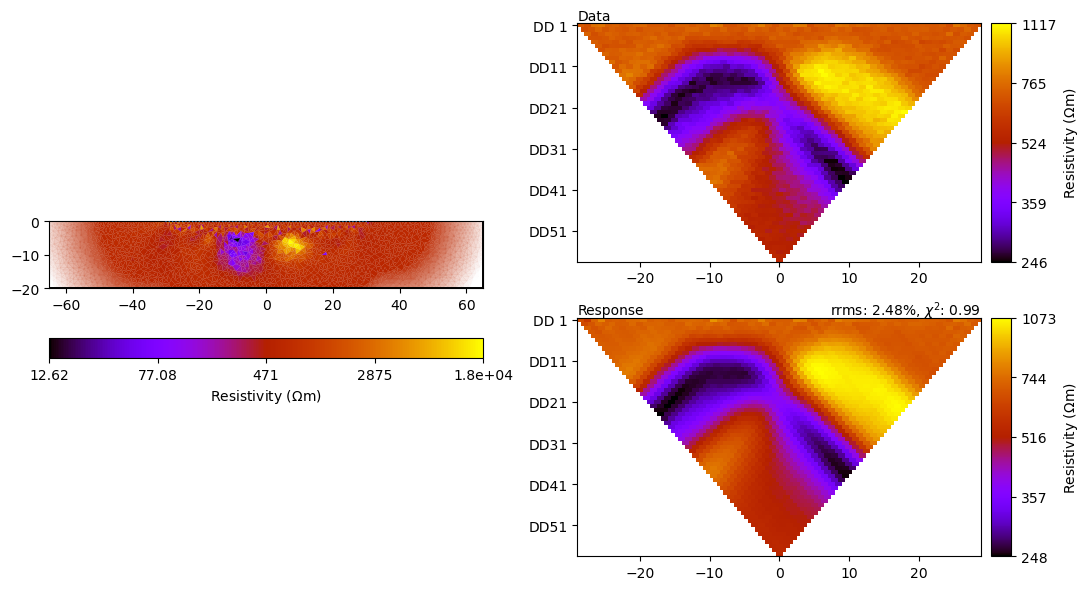

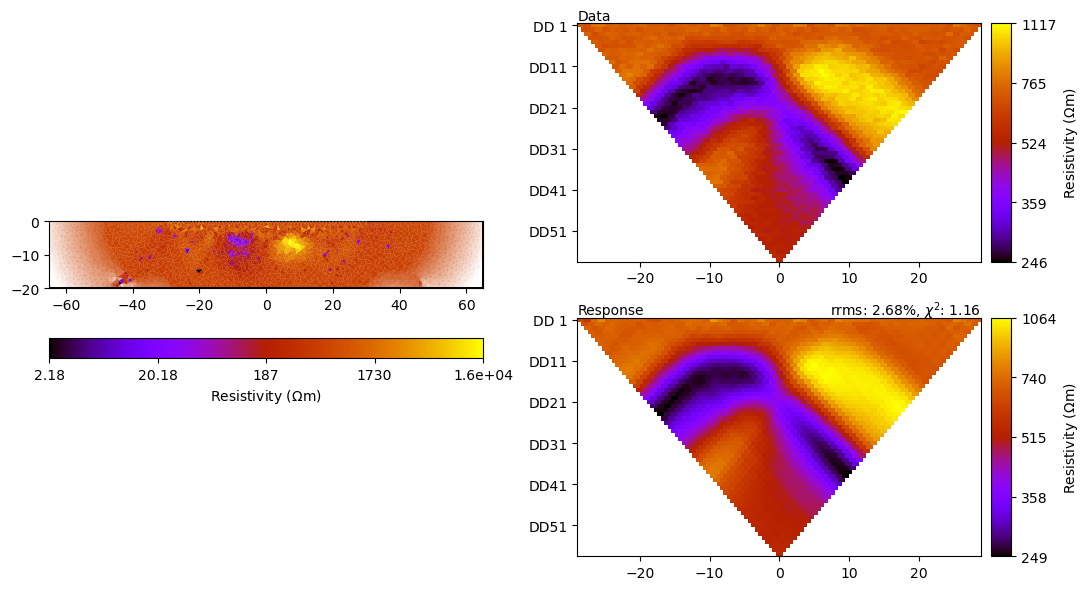

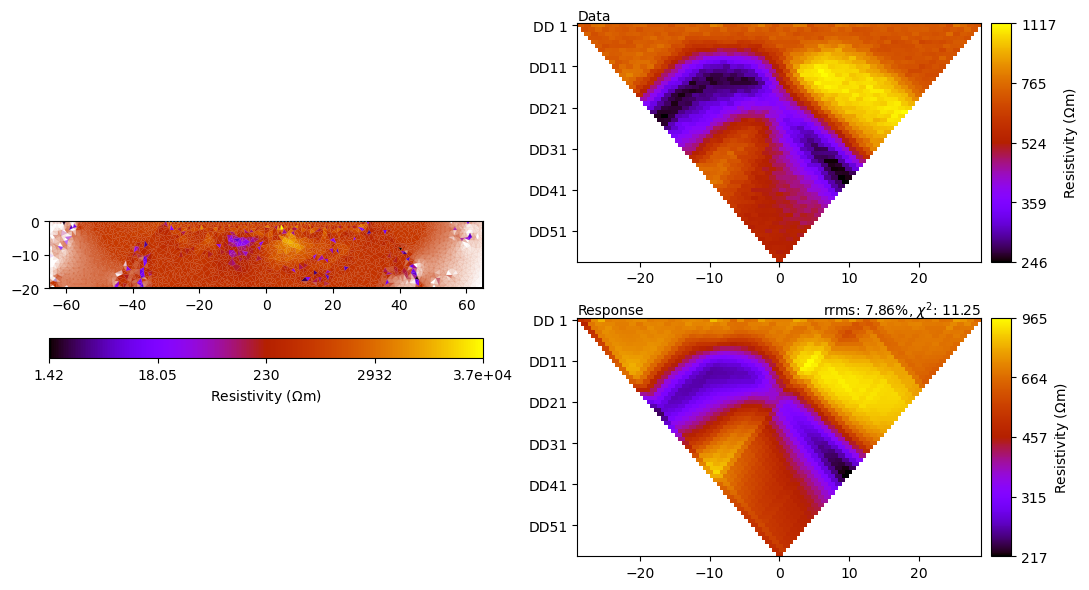

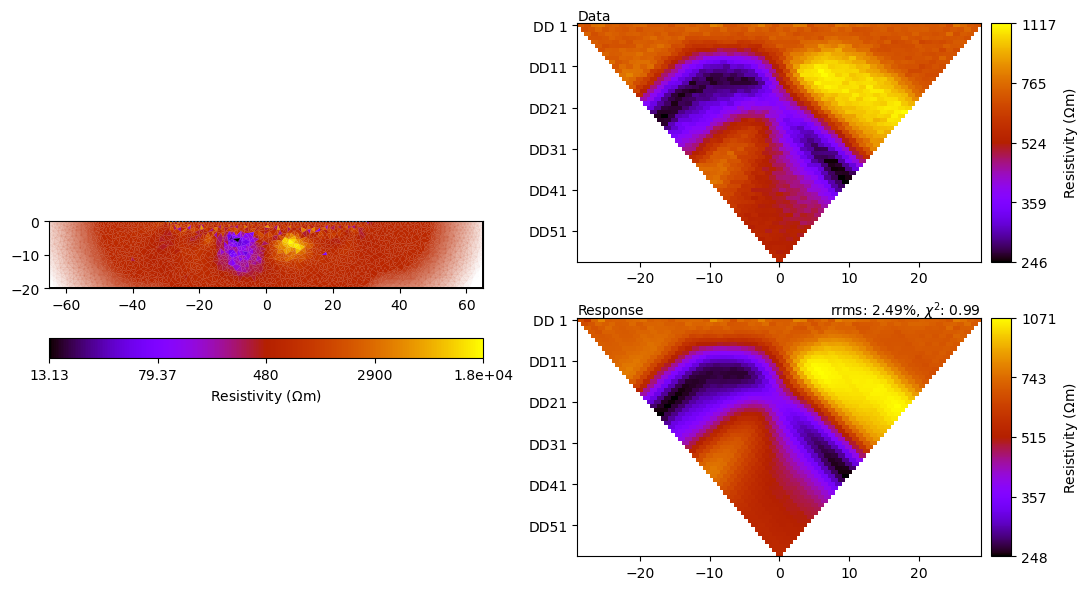

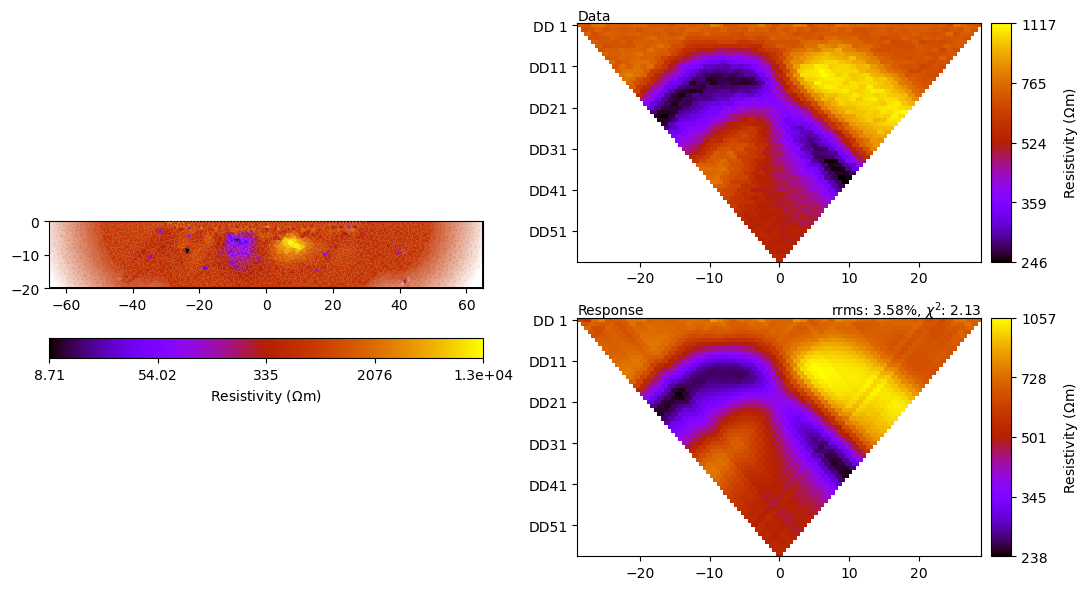

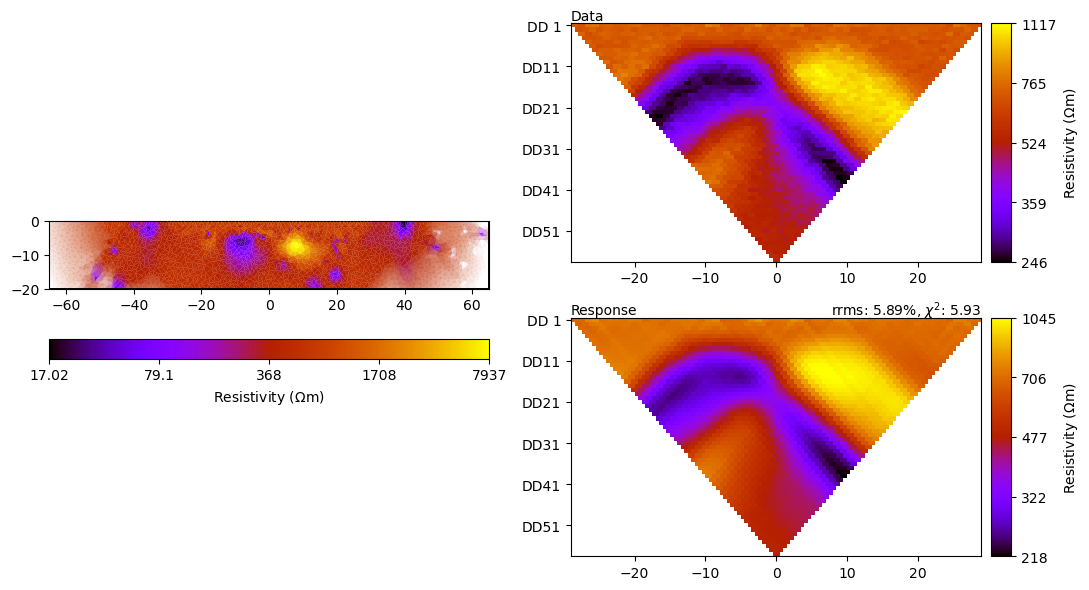

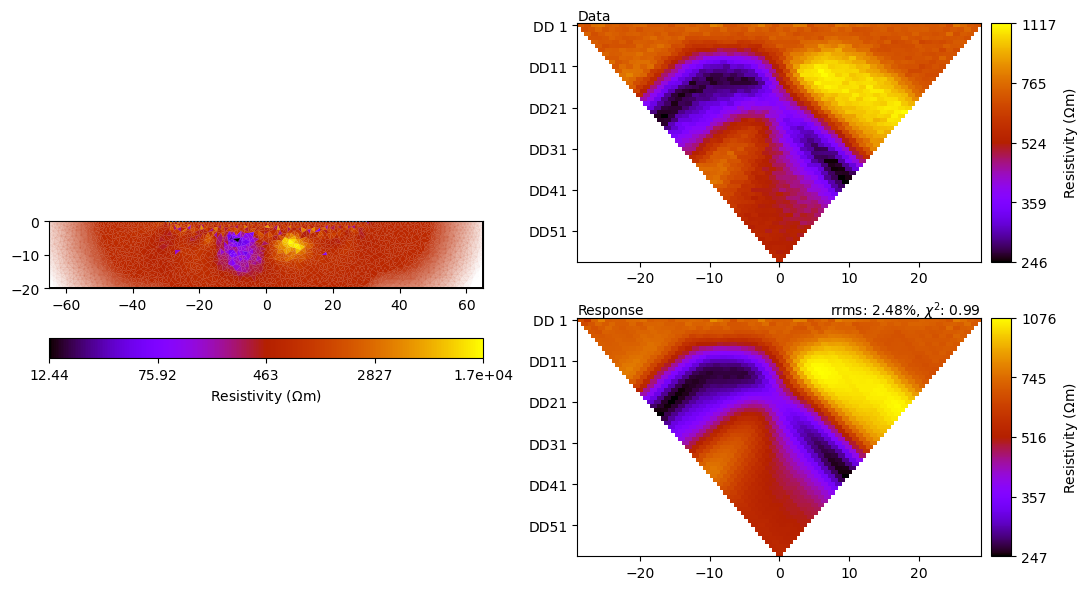

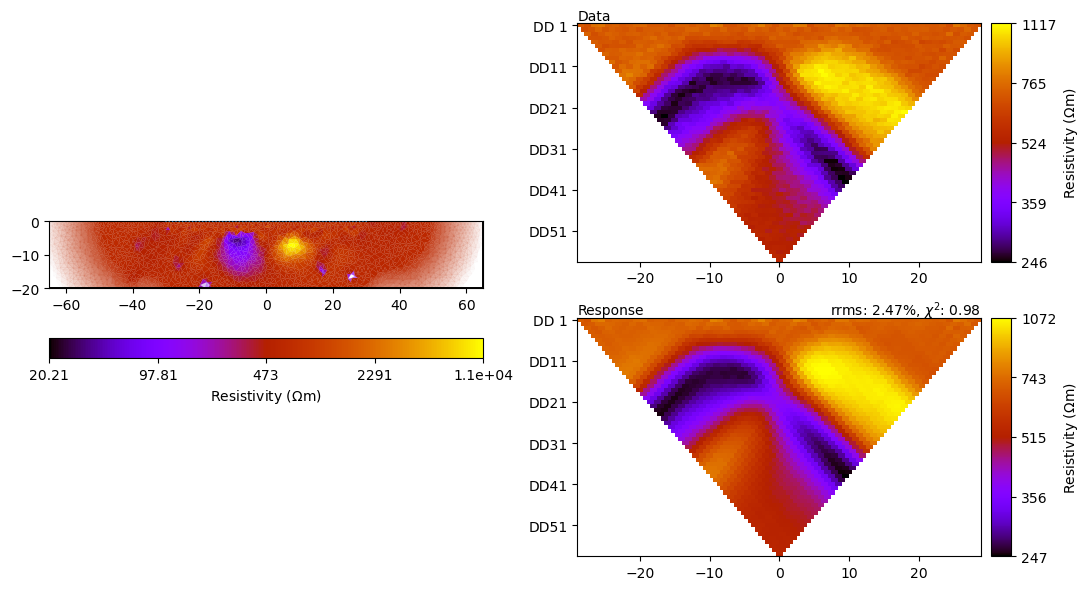

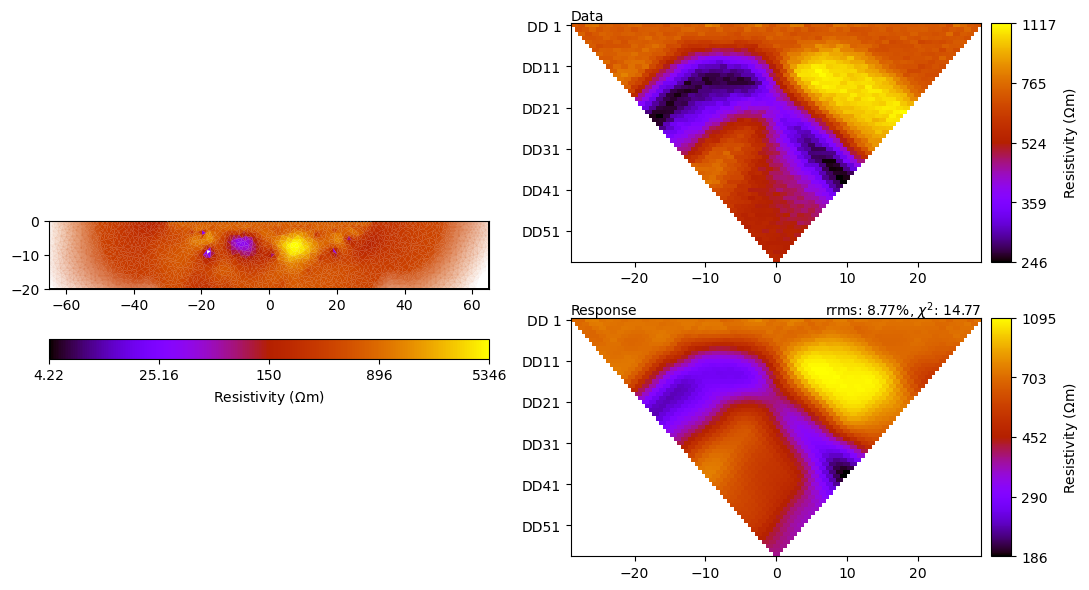

In [17]:
a_list = [0, 25, 100]
lam_list = [1e-7, 1e-5, 1e-3] 
beta = 1e-10

r_me = []
tit  = []

for a in a_list:
    for lam in lam_list:
        ERT2 = ert.ERTManager(ert_data)
        Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a, sensitivity_list=[sens_ert_norm])

        KWe = dict(lam=lam, verbose=False)
        Je.setKWInv([KWe])
        Je.setNames(['ERT'])
        Je.setMethodMesh(extmesh, 0)

        Je.runInversion('MEG', maxIter=10, chi_limit=1)
        ERT2.showResultAndFit(cMap=c_ert)

        [r_est] = Je.getModels()
        
        r_me.append(r_est)
        tit.append(f'lam={lam}, a={a}')

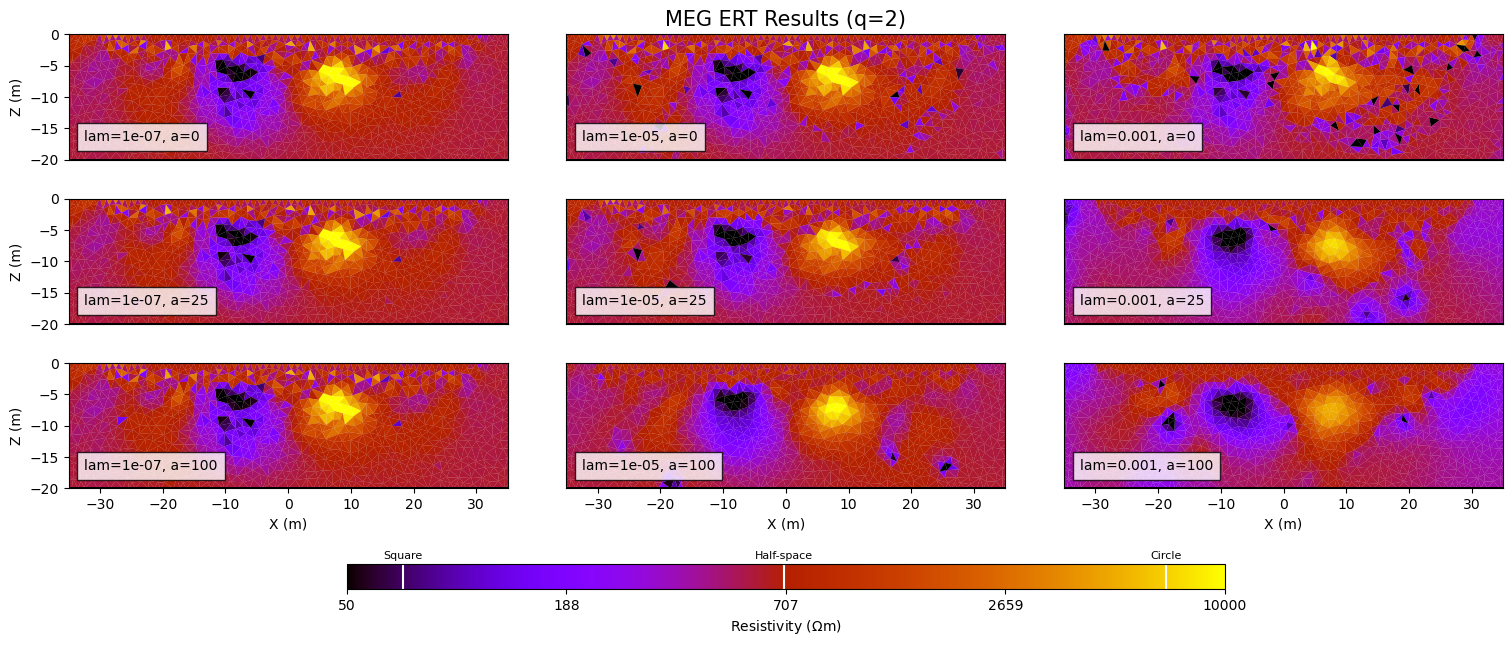

In [18]:
fig, ax = plt.subplots(3,3, figsize=(15,5))
fig.tight_layout(pad=0.5)
ax[0,1].set_title(f'MEG ERT Results (q={q})', fontsize = 15)
for i in np.arange(3):
    for j in np.arange(3):
        pg.show(invmesh, r_me[i*3+j], ax=ax[i,j], 
                cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], 
                colorBar=False, logScale=True)
        
        ax[i,j].text(-32.5, -17, tit[i*3+j], fontsize=10,
                     bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        ax[i,j].set_xlim(-35,35)
        ax[i,j].set_ylim(-20,0)

# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Z (m)')
for axis in ax[-1,:]:
    axis.set_xlabel('X (m)')
for axis_ar in ax[:2,:]:
    for axis in axis_ar:
        axis.set_xticks([])
for axis_ar in ax[:,1:]:
    for axis in axis_ar:
        axis.set_yticks([])

# Add colorbar
cax = ax[2,1].inset_axes([-0.5, -0.8, 2, 0.2])
createColorBarOnly(ax=cax, cMin=lim_ert[0], cMax=lim_ert[1], logScale=True,cMap=c_ert,
                  label=pg.unit('res'), orientation='horizontal')
for i, r in enumerate([r_left, r_right,r_back]):
    cax.plot([r]*2, [0,1], 'w')
    cax.text(r, 1.3, ert_label[i], fontsize=8, horizontalalignment='center', verticalalignment='center')
    
plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/With_Sens/Comp_MEG_lam_a_q{q}_ERT.pdf', 
            bbox_inches='tight',
           dpi=600)

## MEG SRT lambda and smoothing tests

31/05/23 - 21:41:06 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:41:06 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:41:06 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
31/05/23 - 21:41:06 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:41:06 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
31/05/23 - 21:41:06 - pyGIMLi - INFO - Setting starting model as reference!


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 792.99
#####     stabilizing functional    S = 261641857.36
#####     joint weighted misfit chi^2 = 792.99
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 256.94
#####     stabilizing functional    S = 1501.52
#####     joint weighted misfit chi^2 = 256.94
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 125.20
#####     stabilizing functional    S = 431.66
#####     joint weighted misfit chi^2 = 125.20
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit c

31/05/23 - 21:43:25 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:43:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:43:25 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
31/05/23 - 21:43:25 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:43:25 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
31/05/23 - 21:43:25 - pyGIMLi - INFO - Setting starting model as reference!


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 1109.24
#####     stabilizing functional    S = 27115003.16
#####     joint weighted misfit chi^2 = 1109.24
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 392.26
#####     stabilizing functional    S = 32043.12
#####     joint weighted misfit chi^2 = 392.26
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 106.92
#####     stabilizing functional    S = 389.00
#####     joint weighted misfit chi^2 = 106.92
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit

31/05/23 - 21:45:47 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:45:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:45:47 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
31/05/23 - 21:45:47 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:45:47 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
31/05/23 - 21:45:47 - pyGIMLi - INFO - Setting starting model as reference!


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 1090.75
#####     stabilizing functional    S = 15916302.77
#####     joint weighted misfit chi^2 = 1090.75
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 442.73
#####     stabilizing functional    S = 24001.81
#####     joint weighted misfit chi^2 = 442.73
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 289.29
#####     stabilizing functional    S = 15544.42
#####     joint weighted misfit chi^2 = 289.29
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=0
#####     SRT weighted misf

31/05/23 - 21:48:04 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:48:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:48:04 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
31/05/23 - 21:48:04 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:48:04 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
31/05/23 - 21:48:04 - pyGIMLi - INFO - Setting starting model as reference!


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 205.54
#####     stabilizing functional    S = 265277273.44
#####     joint weighted misfit chi^2 = 205.54
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 148.39
#####     stabilizing functional    S = 32627.12
#####     joint weighted misfit chi^2 = 148.39
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 121.61
#####     stabilizing functional    S = 1851.87
#####     joint weighted misfit chi^2 = 121.61
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted mi

31/05/23 - 21:50:23 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:50:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:50:23 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


31/05/23 - 21:50:24 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:50:24 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
31/05/23 - 21:50:24 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 217.13
#####     stabilizing functional    S = 326707248.97
#####     joint weighted misfit chi^2 = 217.13
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 150.57
#####     stabilizing functional    S = 87.73
#####     joint weighted misfit chi^2 = 150.57
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 94.34
#####     stabilizing functional    S = 629.81
#####     joint weighted misfit chi^2 = 94.34
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 67.52
#####     stabili

31/05/23 - 21:52:43 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:52:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:52:43 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
31/05/23 - 21:52:43 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:52:43 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
31/05/23 - 21:52:43 - pyGIMLi - INFO - Setting starting model as reference!


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 596.42
#####     stabilizing functional    S = 499569462.82
#####     joint weighted misfit chi^2 = 596.42
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 234.90
#####     stabilizing functional    S = 146369.59
#####     joint weighted misfit chi^2 = 234.90
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 243.20
#####     stabilizing functional    S = 23765876.31
#####     joint weighted misfit chi^2 = 243.20
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=50
#####     SRT weight

31/05/23 - 21:54:53 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:54:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:54:53 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
31/05/23 - 21:54:53 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:54:53 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
31/05/23 - 21:54:53 - pyGIMLi - INFO - Setting starting model as reference!


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 129.45
#####     stabilizing functional    S = 87278890.48
#####     joint weighted misfit chi^2 = 129.45
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 111.27
#####     stabilizing functional    S = 31.92
#####     joint weighted misfit chi^2 = 111.27
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 86.03
#####     stabilizing functional    S = 290.21
#####     joint weighted misfit chi^2 = 86.03
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfi

31/05/23 - 21:57:13 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:57:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:57:13 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
31/05/23 - 21:57:13 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:57:13 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


Starting Iteration 0...
... SRT


31/05/23 - 21:57:13 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 275.29
#####     stabilizing functional    S = 889036235.20
#####     joint weighted misfit chi^2 = 275.29
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 113.56
#####     stabilizing functional    S = 1561.62
#####     joint weighted misfit chi^2 = 113.56
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 67.52
#####     stabilizing functional    S = 284.05
#####     joint weighted misfit chi^2 = 67.52
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 52.53
#####     s

31/05/23 - 21:59:32 - pyGIMLi - INFO - Found 1 regions.
31/05/23 - 21:59:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
31/05/23 - 21:59:32 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
31/05/23 - 21:59:32 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
31/05/23 - 21:59:32 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
31/05/23 - 21:59:32 - pyGIMLi - INFO - Setting starting model as reference!


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 3282.03
#####     stabilizing functional    S = 1008305893.04
#####     joint weighted misfit chi^2 = 3282.03
############################################################
       
Starting iteration 2...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 817.89
#####     stabilizing functional    S = 11.09
#####     joint weighted misfit chi^2 = 817.89
############################################################
       
Starting iteration 3...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 499.08
#####     stabilizing functional    S = 806790.96
#####     joint weighted misfit chi^2 = 499.08
############################################################
       
Starting iteration 4...
Set JMEG weights for SRT with q=2, b=1e-10 and a=200
#####     SRT weigh

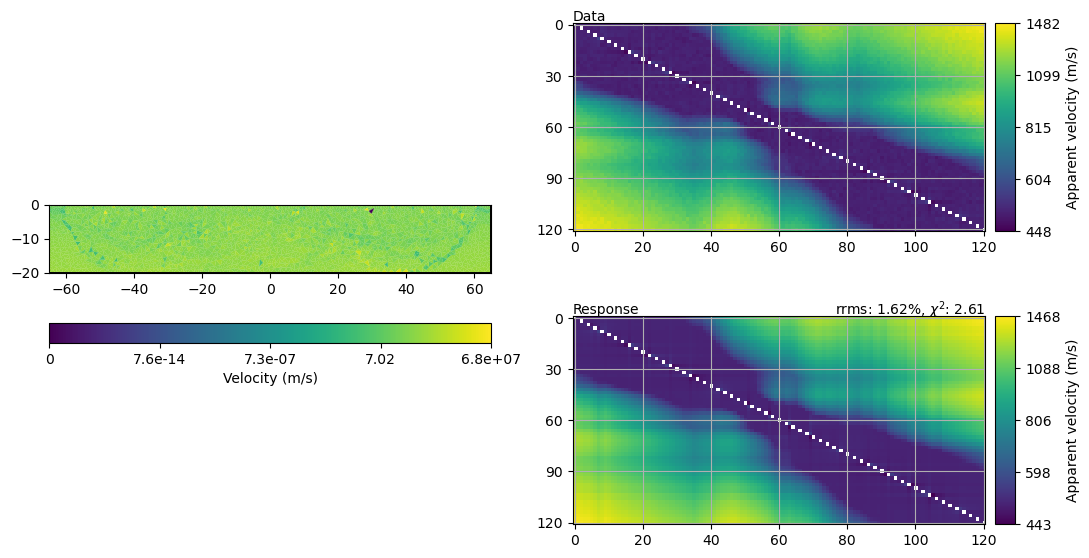

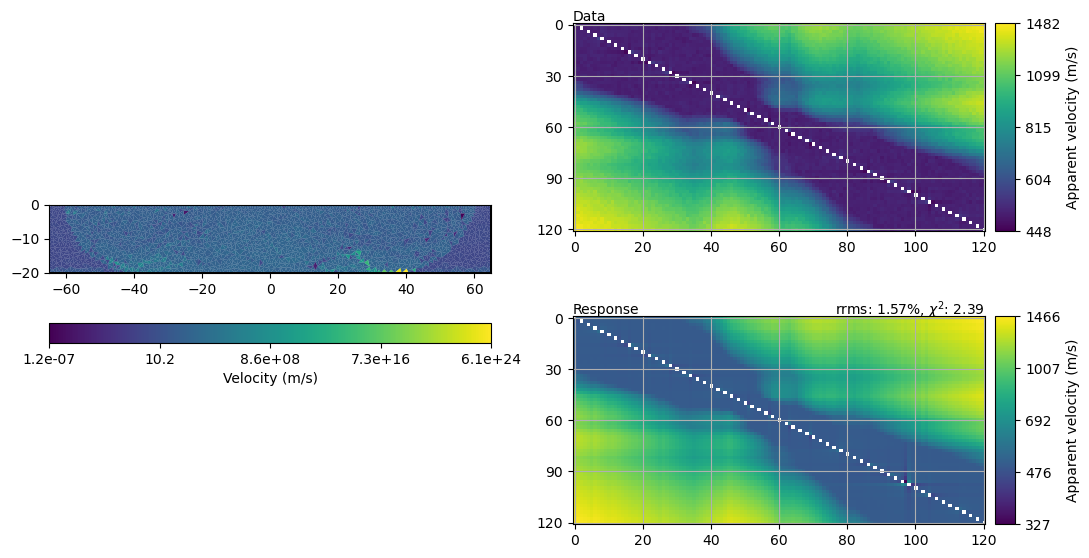

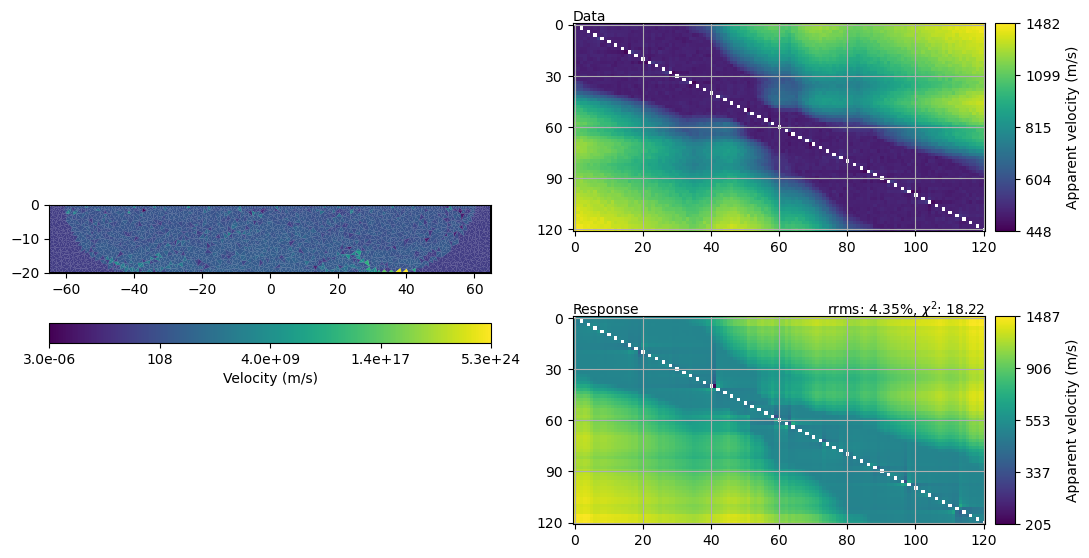

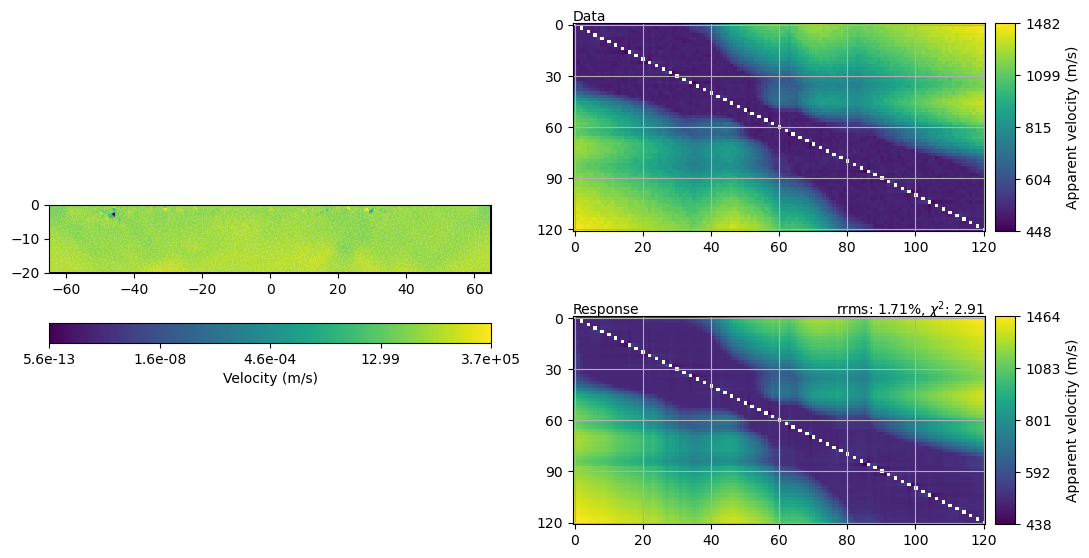

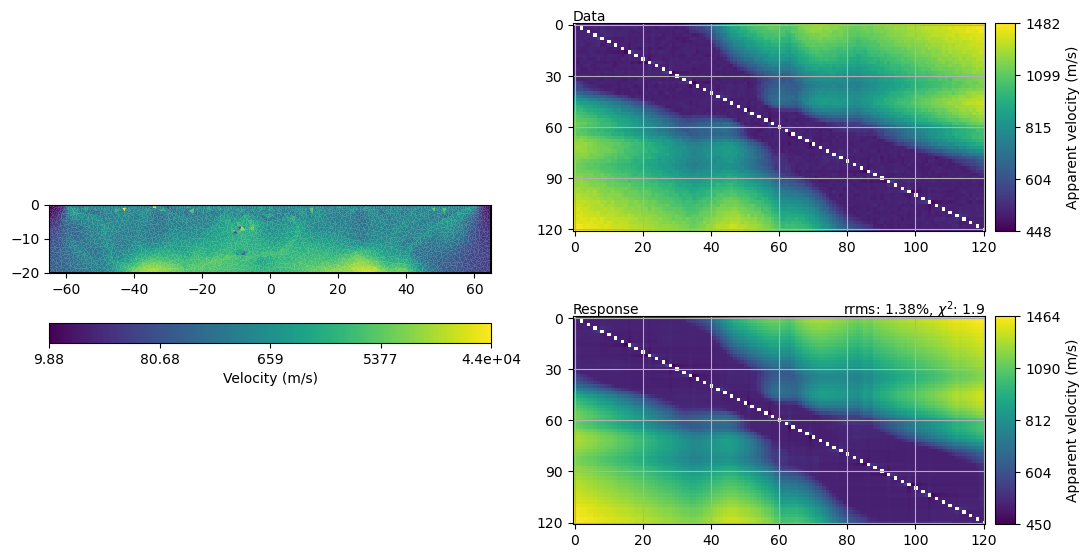

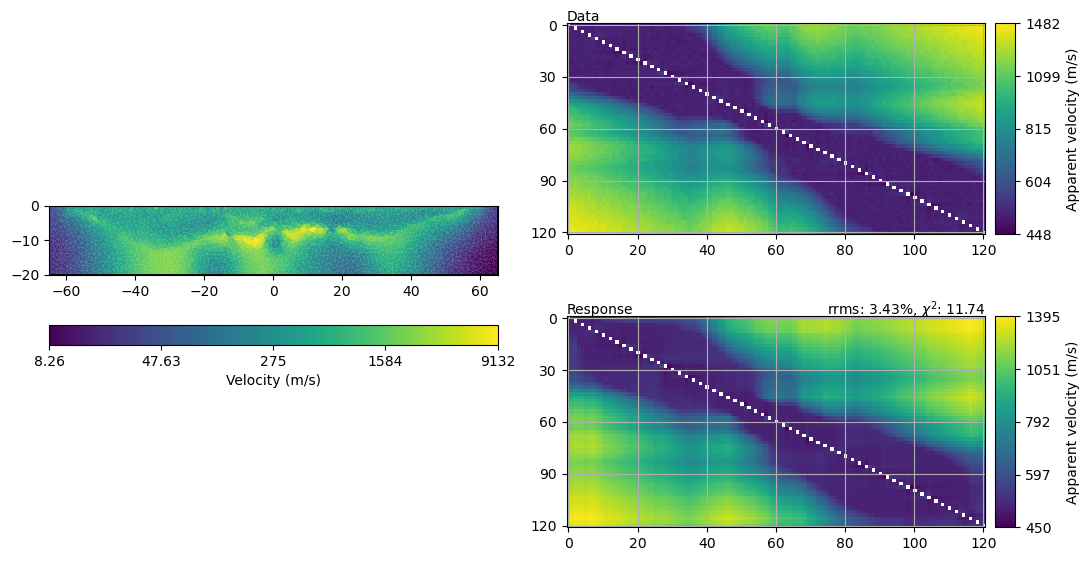

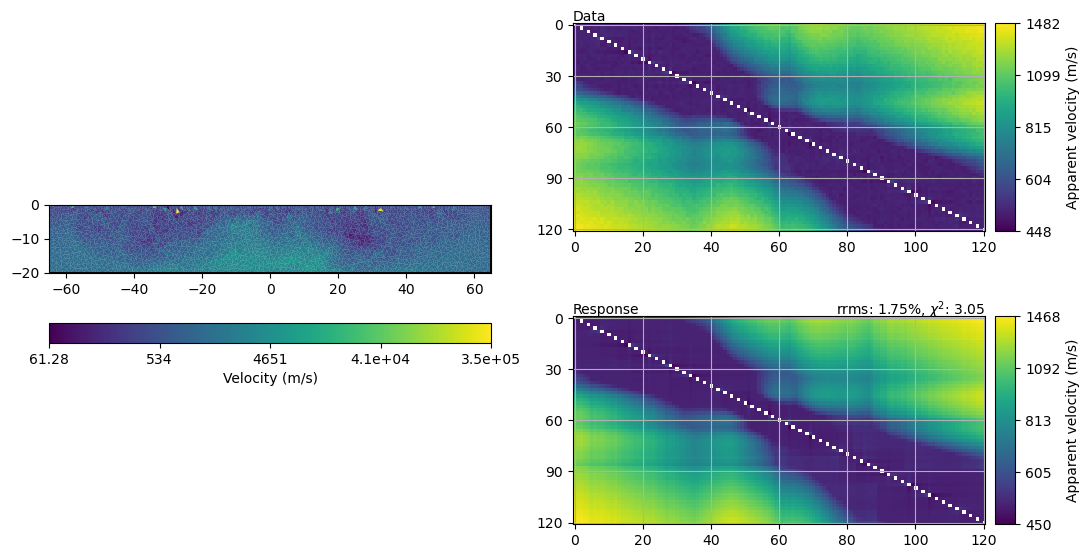

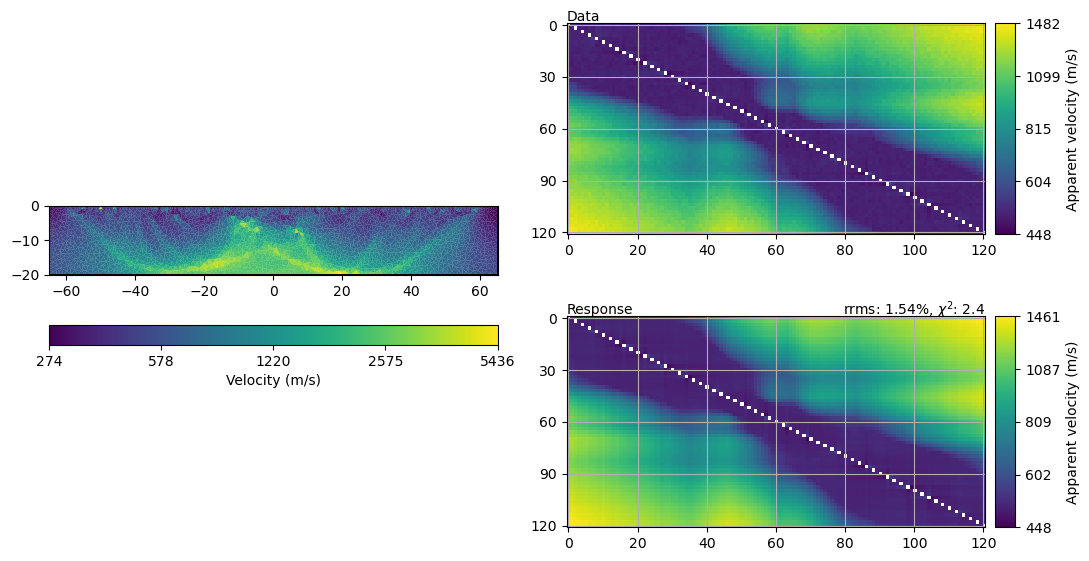

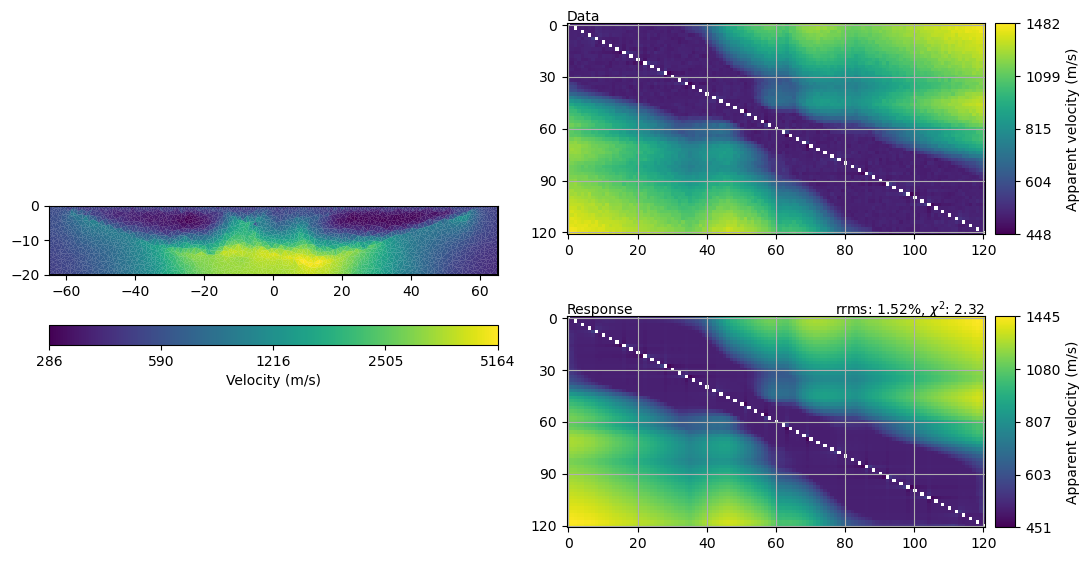

In [19]:
a_list = [0, 50, 200]
lam_list = [1e-7, 1e-5, 1e-3] 
beta = 1e-10

v_me = []
tit  = []

for a in a_list:
    for lam in lam_list:
        SRT2 = TravelTimeManager(tt_data)
        Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a, sensitivity_list=[sens_srt_norm])

        KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=4500, secNodes=1)
        Js.setKWInv([KWs])
        Js.setNames(['SRT'])

        Js.runInversion('MEG', maxIter=20, chi_limit=1.5)
        SRT2.inv.model = 1/SRT2.inv.model
        SRT2.showResultAndFit(cMap=c_srt)

        [v_est] = Js.getModels()
        
        v_me.append(v_est)
        tit.append(f'lam={lam}, a={a}')

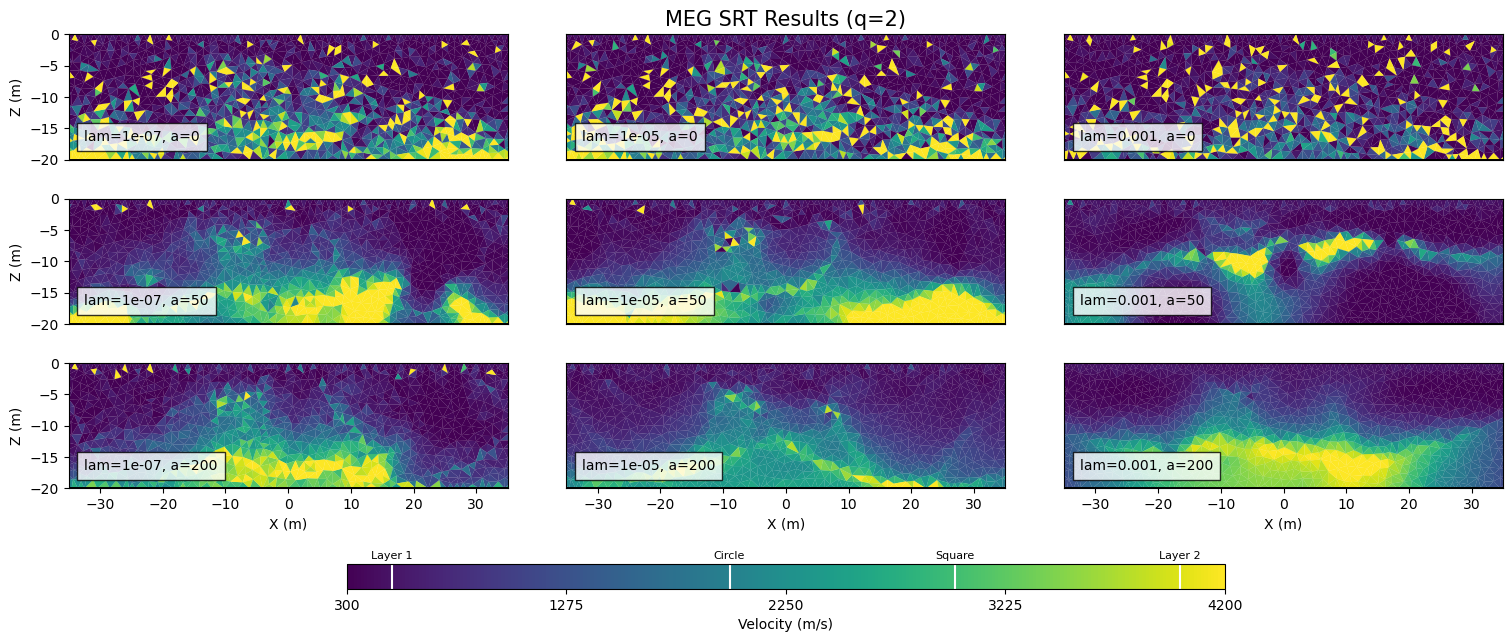

In [20]:
fig, ax = plt.subplots(3,3, figsize=(15,5))
fig.tight_layout(pad=0.5)
ax[0,1].set_title(f'MEG SRT Results (q={q})', fontsize = 15)
for i in np.arange(3):
    for j in np.arange(3):
        pg.show(invmesh, v_me[i*3+j], ax=ax[i,j], 
                cMap=c_srt, cMin=lim_srt[0], cMax=lim_srt[1], 
                colorBar=False, logScale=False)
        
        ax[i,j].text(-32.5, -17, tit[i*3+j], fontsize=10,
                     bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        ax[i,j].set_xlim(-35,35)
        ax[i,j].set_ylim(-20,0)

# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Z (m)')
for axis in ax[-1,:]:
    axis.set_xlabel('X (m)')
for axis_ar in ax[:2,:]:
    for axis in axis_ar:
        axis.set_xticks([])
for axis_ar in ax[:,1:]:
    for axis in axis_ar:
        axis.set_yticks([])

# Add colorbar
cax = ax[2,1].inset_axes([-0.5, -0.8, 2, 0.2])
createColorBarOnly(ax=cax, cMin=lim_srt[0], cMax=lim_srt[1], logScale=False,cMap=c_srt,
                  label=pg.unit('vel'), orientation='horizontal')
for i, v in enumerate([v_left, v_right, v_layer1, v_layer2]):
    cax.plot([v]*2, [0,1], 'w')
    cax.text(v, 1.3, srt_label[i], fontsize=8, horizontalalignment='center', verticalalignment='center')

plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/With_Sens/Comp_MEG_lam_a_q{q}_SRT.pdf', 
            bbox_inches='tight',
            dpi=600)